# Here is the background information on your task

At GE Aviation, we use the concept of a “Data Lake”.  A Data Lake is a single database instance that contains data from all around Aviation. Everything from financial, delivery (of parts and engines), supplier, engine data, customer data, and so on. 

The advantage of a Data Lake is that allows the developer to make a single connection string to the Data Lake, and as long as the developer has permissions to see the data – they are able to immediately start creating data-driven insights in a centralized repository of data. 

To simplify this experience, we have put all tables into a single schema (database inside the data lake). 

There are 8 datasets that are needed in order to accomplish this task. 

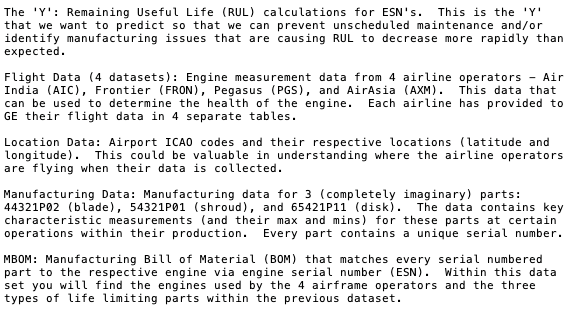

# Problem Statement

Here is your task

You have been asked by GE Aviation leadership to create a single data set that combines all the data listed above into a single table.   

The data you have been given has sheets related to Flight data (so data relating to the health of the mechanical engine of a plane), Location Data for airports, Manufacturing Data (which relate to various airplane parts), and a manufacturing bill of material (which tells you what engines have been used).

In this final form, we can then use this table to either create a prediction of RUL or visualize the data for easy user consumption. This will be done in task two.

You can complete this task using one of these three tools: Excel, Tableau, or DataIku. 

You only need to complete it through one of the methods. For maximum learning, we recommend starting with Excel to get a granular understanding of data analytics, and then for you to try either Tableau or DataIku (as industry grade tools). If you are a computer science or engineering student, we strongly recommend DataIku or tableau. 

Before you jump into this task- take a second to read the data glossary so you can have a full understanding of the data you're looking at!

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from math import *
import seaborn as sns

In [2]:
#Setting margins
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows")

# Task Part one

In [3]:
df = pd.read_excel("GE_Dataset_ Task1.xlsx", sheet_name = None)

In [4]:
print(df.keys())

dict_keys(['Title Sheet', 'Sheet1', 'av_engine_data_axm_psql', 'av_engine_data_fron_psql', 'av_engine_data_aic_psql', 'av_engine_data_pgt_psql', 'av_lkp_airport_codes_t_psql', 'av_bom_manufacturing_psql', 'av_manufacturing_supply_chain', 'av_esn_rul_psql'])


# Tables/Excel sheets
<ul>
<li>'av_engine_data_axm_psql' = axm</li>
<li>'av_engine_data_fron_psql' = fron</li>
<li>'av_engine_data_aic_psql' = aic</li>
<li>'av_engine_data_pgt_psql' = pgt</li>
<li>'av_lkp_airport_codes_t_psql' = location</li>
<li>'av_bom_manufacturing_psql' = bom_manuf</li>
<li>'av_manufacturing_supply_chain' = manu_supply</li>
<li>'av_esn_rul_psql' = esn_rul</li>
</ul>

In [5]:
sheet1 = df['Sheet1']
axm_df = df['av_engine_data_axm_psql']
fron_df = df['av_engine_data_fron_psql']
aic_df = df['av_engine_data_aic_psql']
pgt_df = df['av_engine_data_pgt_psql']
loc_df = df['av_lkp_airport_codes_t_psql']
bom_manuf_df = df['av_bom_manufacturing_psql']
manu_supply_df = df['av_manufacturing_supply_chain']
esn_rul_df = df['av_esn_rul_psql']


In [6]:
print(f"The sheet 1 has {sheet1.shape[0]} rows and {sheet1.shape[1]} columns")
print(f"The number of rows and columns in flight data of Air Asia is: {axm_df.shape[0]} and {axm_df.shape[1]} respectively")
print(f"The number of rows and columns in flight data of Frontier is: {fron_df.shape[0]} and {fron_df.shape[1]} respectively")
print(f"The number of rows and columns in flight data of Air India is: {aic_df.shape[0]} and {aic_df.shape[1]} respectively")
print(f"The number of rows and columns in flight data of Pegasus is: {pgt_df.shape[0]} and {pgt_df.shape[1]} respectively")
print(f"The number of rows and columns in Location data of Airport ICAO is: {loc_df.shape[0]} and {loc_df.shape[1]} respectively")
print(f"The number of rows and columns in Manufacturing data is: {bom_manuf_df.shape[0]} and {bom_manuf_df.shape[1]} respectively")
print(f"The number of rows and columns in Manufacturing Supply Chain is: {manu_supply_df.shape[0]} and {manu_supply_df.shape[1]} respectively")
print(f"The number of rows and columns in Engine Serial Number is: {esn_rul_df.shape[0]} and {esn_rul_df.shape[1]} respectively")

The sheet 1 has 0 rows and 0 columns
The number of rows and columns in flight data of Air Asia is: 21188 and 32 respectively
The number of rows and columns in flight data of Frontier is: 7290 and 32 respectively
The number of rows and columns in flight data of Air India is: 5820 and 32 respectively
The number of rows and columns in flight data of Pegasus is: 6300 and 32 respectively
The number of rows and columns in Location data of Airport ICAO is: 319 and 3 respectively
The number of rows and columns in Manufacturing data is: 20200 and 5 respectively
The number of rows and columns in Manufacturing Supply Chain is: 64000 and 8 respectively
The number of rows and columns in Engine Serial Number is: 100 and 2 respectively


In [7]:
axm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21188 entries, 0 to 21187
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dataset           21188 non-null  object        
 1   esn               21188 non-null  int64         
 2   unit              21188 non-null  int64         
 3   flight_cycle      21188 non-null  int64         
 4   datetime          21188 non-null  datetime64[ns]
 5   operator          21188 non-null  object        
 6   depart_icao       20408 non-null  object        
 7   destination_icao  20198 non-null  object        
 8   hpc_eff_mod       21188 non-null  float64       
 9   hpc_flow_mod      21188 non-null  float64       
 10  tra               21188 non-null  int64         
 11  t2                21188 non-null  float64       
 12  t24               21188 non-null  float64       
 13  t30               21188 non-null  float64       
 14  t50               2118

In [8]:
fron_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7290 entries, 0 to 7289
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dataset           7290 non-null   object        
 1   esn               7290 non-null   int64         
 2   unit              7290 non-null   int64         
 3   flight_cycle      7290 non-null   int64         
 4   datetime          7290 non-null   datetime64[ns]
 5   operator          7290 non-null   object        
 6   depart_icao       7260 non-null   object        
 7   destination_icao  7227 non-null   object        
 8   hpc_eff_mod       7290 non-null   float64       
 9   hpc_flow_mod      7290 non-null   float64       
 10  tra               7290 non-null   int64         
 11  t2                7290 non-null   float64       
 12  t24               7290 non-null   float64       
 13  t30               7290 non-null   float64       
 14  t50               7290 n

In [9]:
aic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dataset           5820 non-null   object        
 1   esn               5820 non-null   int64         
 2   unit              5820 non-null   int64         
 3   flight_cycle      5820 non-null   int64         
 4   datetime          5820 non-null   datetime64[ns]
 5   operator          5820 non-null   object        
 6   depart_icao       5768 non-null   object        
 7   destination_icao  5771 non-null   object        
 8   hpc_eff_mod       5820 non-null   float64       
 9   hpc_flow_mod      5820 non-null   float64       
 10  tra               5820 non-null   int64         
 11  t2                5820 non-null   float64       
 12  t24               5820 non-null   float64       
 13  t30               5820 non-null   float64       
 14  t50               5820 n

In [10]:
pgt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dataset           6300 non-null   object        
 1   esn               6300 non-null   int64         
 2   unit              6300 non-null   int64         
 3   flight_cycle      6300 non-null   int64         
 4   datetime          6300 non-null   datetime64[ns]
 5   operator          6300 non-null   object        
 6   depart_icao       6123 non-null   object        
 7   destination_icao  5942 non-null   object        
 8   hpc_eff_mod       6300 non-null   float64       
 9   hpc_flow_mod      6300 non-null   float64       
 10  tra               6300 non-null   int64         
 11  t2                6300 non-null   float64       
 12  t24               6300 non-null   float64       
 13  t30               6300 non-null   float64       
 14  t50               6300 n

In [11]:
loc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   airport_icao           319 non-null    object 
 1   destination_latitude   319 non-null    float64
 2   destination_longitude  319 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.6+ KB


In [12]:
bom_manuf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20200 entries, 0 to 20199
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   esn      20200 non-null  int64 
 1   pn       20200 non-null  object
 2   sn       20200 non-null  int64 
 3   desc     20200 non-null  object
 4   vstream  20200 non-null  object
dtypes: int64(2), object(3)
memory usage: 789.2+ KB


In [13]:
manu_supply_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sn         64000 non-null  int64  
 1   pn         64000 non-null  object 
 2   op         64000 non-null  object 
 3   part_desc  64000 non-null  object 
 4   kc         64000 non-null  int64  
 5   msmts      64000 non-null  float64
 6   max        64000 non-null  float64
 7   min        64000 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 3.9+ MB


In [14]:
esn_rul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   esn     100 non-null    int64
 1   rul     100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [15]:
aic_df.head()

,dataset,esn,unit,flight_cycle,datetime,operator,depart_icao,destination_icao,hpc_eff_mod,hpc_flow_mod,tra,t2,t24,t30,t50,p2,p15,p30,nf,nc,epr,ps30,phi,nrf,nrc,bpr,farb,htbleed,nf_dmd,pcnfr_dmd,w31,w32
0,train_FD001,999001,1,1,2018-01-11 17:10:56,AIC,VTBS,VICG,-0.0005,0.0002,100,518.67,182.55,1584.02,1402.78,14.62,21.61,554.01,2388.11,9053.43,1.3,47.41,521.93,2388.12,8130.36,8.4279,0.03,392,2388,100,38.86,23.4513
1,train_FD001,999001,1,2,2018-01-12 01:07:00,AIC,VICG,VTBS,0.0016,-0.0003,100,518.67,182.54,1580.41,1403.09,14.62,21.61,554.06,2388.03,9046.09,1.3,47.30,521.72,2388.09,8134.28,8.4230,0.03,391,2388,100,38.80,23.3881
2,train_FD001,999001,1,3,2018-01-12 02:06:59,AIC,VICG,VTBS,-0.0017,0.0001,100,518.67,182.74,1579.25,1406.81,14.62,21.61,553.76,2388.07,9054.42,1.3,47.27,521.97,2388.09,8133.95,8.3951,0.03,391,2388,100,38.84,23.3085
3,train_FD001,999001,1,4,2018-01-12 07:42:00,AIC,VTBS,VIDP,-0.0012,-0.0002,100,518.67,182.62,1592.04,1397.93,14.62,21.61,553.88,2388.03,9049.64,1.3,47.29,522.04,2388.10,8129.85,8.4040,0.03,391,2388,100,39.03,23.3975
4,train_FD001,999001,1,5,2018-01-12 08:42:17,AIC,VTBS,VIDP,0.0027,0.0001,100,518.67,183.29,1584.65,1401.48,14.62,21.61,554.03,2388.07,9045.85,1.3,47.58,522.25,2387.97,8132.67,8.4135,0.03,392,2388,100,38.80,23.3820


In [16]:
aic_df.dtypes

dataset                     object
esn                          int64
unit                         int64
flight_cycle                 int64
datetime            datetime64[ns]
operator                    object
depart_icao                 object
destination_icao            object
hpc_eff_mod                float64
hpc_flow_mod               float64
tra                          int64
t2                         float64
t24                        float64
t30                        float64
t50                        float64
p2                         float64
p15                        float64
p30                        float64
nf                         float64
nc                         float64
epr                        float64
ps30                       float64
phi                        float64
nrf                        float64
nrc                        float64
bpr                        float64
farb                       float64
htbleed                      int64
nf_dmd              

In [17]:
aic_df.nunique().sort_values(ascending = False)

datetime            4096
nc                  3337
nrc                 3206
w32                 2993
t50                 2666
t30                 2159
bpr                 1501
p30                  451
phi                  386
flight_cycle         334
t24                  281
ps30                 145
hpc_eff_mod          140
w31                  109
nrf                   49
nf                    47
esn                   40
depart_icao           35
unit                  35
destination_icao      34
hpc_flow_mod          13
htbleed               11
dataset                2
p15                    2
epr                    1
p2                     1
t2                     1
farb                   1
tra                    1
nf_dmd                 1
pcnfr_dmd              1
operator               1
dtype: int64

In [18]:
axm_df.nunique().sort_values(ascending = False)

datetime            7630
nc                  4366
nrc                 4216
w32                 3856
t50                 3356
t30                 2569
bpr                 1704
p30                  479
phi                  405
flight_cycle         303
t24                  291
ps30                 152
hpc_eff_mod          148
w31                  115
destination_icao      78
depart_icao           77
esn                   70
unit                  55
nrf                   51
nf                    47
hpc_flow_mod          14
htbleed               12
dataset                2
p15                    2
epr                    1
p2                     1
t2                     1
farb                   1
tra                    1
nf_dmd                 1
pcnfr_dmd              1
operator               1
dtype: int64

In [19]:
pgt_df.nunique().sort_values(ascending = False)

datetime            4359
nc                  3575
nrc                 3446
w32                 3134
t50                 2781
t30                 2251
bpr                 1553
p30                  447
phi                  368
t24                  279
flight_cycle         274
ps30                 148
hpc_eff_mod          144
w31                  108
depart_icao           93
destination_icao      90
nrf                   48
nf                    47
esn                   44
unit                  42
hpc_flow_mod          13
htbleed               10
dataset                2
p15                    2
epr                    1
p2                     1
t2                     1
farb                   1
tra                    1
nf_dmd                 1
pcnfr_dmd              1
operator               1
dtype: int64

In [20]:
fron_df.nunique().sort_values(ascending = False)

datetime            4476
nc                  3892
nrc                 3671
w32                 3390
t50                 3000
t30                 2326
bpr                 1601
p30                  456
phi                  385
flight_cycle         286
t24                  280
ps30                 150
hpc_eff_mod          149
w31                  114
depart_icao           79
destination_icao      77
esn                   46
nrf                   46
nf                    44
unit                  42
hpc_flow_mod          13
htbleed               11
dataset                2
p15                    2
epr                    1
p2                     1
t2                     1
farb                   1
tra                    1
nf_dmd                 1
pcnfr_dmd              1
operator               1
dtype: int64

In [21]:
aic_df.datetime.max(), aic_df.datetime.min()

(Timestamp('2018-07-02 18:55:12'), Timestamp('2017-12-31 18:42:10'))

In [22]:
#Creating a new column from t24
aic_df["t24_adjusted"] = aic_df["t24"] + 459.67
aic_df.head()

,dataset,esn,unit,flight_cycle,datetime,operator,depart_icao,destination_icao,hpc_eff_mod,hpc_flow_mod,tra,t2,t24,t30,t50,p2,p15,p30,nf,nc,epr,ps30,phi,nrf,nrc,bpr,farb,htbleed,nf_dmd,pcnfr_dmd,w31,w32,t24_adjusted
0,train_FD001,999001,1,1,2018-01-11 17:10:56,AIC,VTBS,VICG,-0.0005,0.0002,100,518.67,182.55,1584.02,1402.78,14.62,21.61,554.01,2388.11,9053.43,1.3,47.41,521.93,2388.12,8130.36,8.4279,0.03,392,2388,100,38.86,23.4513,642.22
1,train_FD001,999001,1,2,2018-01-12 01:07:00,AIC,VICG,VTBS,0.0016,-0.0003,100,518.67,182.54,1580.41,1403.09,14.62,21.61,554.06,2388.03,9046.09,1.3,47.30,521.72,2388.09,8134.28,8.4230,0.03,391,2388,100,38.80,23.3881,642.21
2,train_FD001,999001,1,3,2018-01-12 02:06:59,AIC,VICG,VTBS,-0.0017,0.0001,100,518.67,182.74,1579.25,1406.81,14.62,21.61,553.76,2388.07,9054.42,1.3,47.27,521.97,2388.09,8133.95,8.3951,0.03,391,2388,100,38.84,23.3085,642.41
3,train_FD001,999001,1,4,2018-01-12 07:42:00,AIC,VTBS,VIDP,-0.0012,-0.0002,100,518.67,182.62,1592.04,1397.93,14.62,21.61,553.88,2388.03,9049.64,1.3,47.29,522.04,2388.10,8129.85,8.4040,0.03,391,2388,100,39.03,23.3975,642.29
4,train_FD001,999001,1,5,2018-01-12 08:42:17,AIC,VTBS,VIDP,0.0027,0.0001,100,518.67,183.29,1584.65,1401.48,14.62,21.61,554.03,2388.07,9045.85,1.3,47.58,522.25,2387.97,8132.67,8.4135,0.03,392,2388,100,38.80,23.3820,642.96


In [23]:
aic_df["t24_original"] = aic_df["t24"]
aic_df["t24"] = aic_df["t24_adjusted"]
aic_df.head()

,dataset,esn,unit,flight_cycle,datetime,operator,depart_icao,destination_icao,hpc_eff_mod,hpc_flow_mod,tra,t2,t24,t30,t50,p2,p15,p30,nf,nc,epr,ps30,phi,nrf,nrc,bpr,farb,htbleed,nf_dmd,pcnfr_dmd,w31,w32,t24_adjusted,t24_original
0,train_FD001,999001,1,1,2018-01-11 17:10:56,AIC,VTBS,VICG,-0.0005,0.0002,100,518.67,642.22,1584.02,1402.78,14.62,21.61,554.01,2388.11,9053.43,1.3,47.41,521.93,2388.12,8130.36,8.4279,0.03,392,2388,100,38.86,23.4513,642.22,182.55
1,train_FD001,999001,1,2,2018-01-12 01:07:00,AIC,VICG,VTBS,0.0016,-0.0003,100,518.67,642.21,1580.41,1403.09,14.62,21.61,554.06,2388.03,9046.09,1.3,47.30,521.72,2388.09,8134.28,8.4230,0.03,391,2388,100,38.80,23.3881,642.21,182.54
2,train_FD001,999001,1,3,2018-01-12 02:06:59,AIC,VICG,VTBS,-0.0017,0.0001,100,518.67,642.41,1579.25,1406.81,14.62,21.61,553.76,2388.07,9054.42,1.3,47.27,521.97,2388.09,8133.95,8.3951,0.03,391,2388,100,38.84,23.3085,642.41,182.74
3,train_FD001,999001,1,4,2018-01-12 07:42:00,AIC,VTBS,VIDP,-0.0012,-0.0002,100,518.67,642.29,1592.04,1397.93,14.62,21.61,553.88,2388.03,9049.64,1.3,47.29,522.04,2388.10,8129.85,8.4040,0.03,391,2388,100,39.03,23.3975,642.29,182.62
4,train_FD001,999001,1,5,2018-01-12 08:42:17,AIC,VTBS,VIDP,0.0027,0.0001,100,518.67,642.96,1584.65,1401.48,14.62,21.61,554.03,2388.07,9045.85,1.3,47.58,522.25,2387.97,8132.67,8.4135,0.03,392,2388,100,38.80,23.3820,642.96,183.29


In [24]:
# fron_df = df['av_engine_data_fron_psql']
# aic_df = df['av_engine_data_aic_psql']
# pgt_df = df['av_engine_data_pgt_psql']
axm_df.columns, aic_df.columns, fron_df.columns, pgt_df.columns

(Index(['dataset', 'esn', 'unit', 'flight_cycle', 'datetime', 'operator',
        'depart_icao', 'destination_icao', 'hpc_eff_mod', 'hpc_flow_mod', 'tra',
        't2', 't24', 't30', 't50', 'p2', 'p15', 'p30', 'nf', 'nc', 'epr',
        'ps30', 'phi', 'nrf', 'nrc', 'bpr', 'farb', 'htbleed', 'nf_dmd',
        'pcnfr_dmd', 'w31', 'w32'],
       dtype='object'),
 Index(['dataset', 'esn', 'unit', 'flight_cycle', 'datetime', 'operator',
        'depart_icao', 'destination_icao', 'hpc_eff_mod', 'hpc_flow_mod', 'tra',
        't2', 't24', 't30', 't50', 'p2', 'p15', 'p30', 'nf', 'nc', 'epr',
        'ps30', 'phi', 'nrf', 'nrc', 'bpr', 'farb', 'htbleed', 'nf_dmd',
        'pcnfr_dmd', 'w31', 'w32', 't24_adjusted', 't24_original'],
       dtype='object'),
 Index(['dataset', 'esn', 'unit', 'flight_cycle', 'datetime', 'operator',
        'depart_icao', 'destination_icao', 'hpc_eff_mod', 'hpc_flow_mod', 'tra',
        't2', 't24', 't30', 't50', 'p2', 'p15', 'p30', 'nf', 'nc', 'epr',
        'ps30',

In [25]:
aic_df.shape

(5820, 34)

In [26]:
axm_df.head()

,dataset,esn,unit,flight_cycle,datetime,operator,depart_icao,destination_icao,hpc_eff_mod,hpc_flow_mod,tra,t2,t24,t30,t50,p2,p15,p30,nf,nc,epr,ps30,phi,nrf,nrc,bpr,farb,htbleed,nf_dmd,pcnfr_dmd,w31,w32
0,test_FD001,999126,26,1,2017-12-31 18:33:07,AXM,VTBD,VTUV,-0.0027,0.0006,100,518.67,642.00,1582.88,1399.92,14.62,21.61,554.54,2388.02,9060.88,1.3,47.38,522.55,2387.98,8147.17,8.3468,0.03,392,2388,100,38.82,23.3876
1,test_FD001,999126,26,2,2017-12-31 19:59:49,AXM,VTUV,VTBD,-0.0029,0.0002,100,518.67,642.35,1589.01,1398.46,14.62,21.61,554.11,2387.96,9063.16,1.3,47.21,521.85,2388.01,8146.58,8.4159,0.03,390,2388,100,39.00,23.3793
2,test_FD001,999126,26,3,2017-12-31 21:44:38,AXM,VTBD,VMMC,0.0008,0.0001,100,518.67,642.69,1590.16,1398.40,14.62,21.61,554.39,2387.99,9057.29,1.3,47.16,522.34,2388.05,8144.60,8.4444,0.03,391,2388,100,39.20,23.3390
3,test_FD001,999126,26,4,2018-01-01 00:50:02,AXM,VMMC,VTBD,-0.0026,0.0005,100,518.67,641.76,1583.37,1389.66,14.62,21.61,553.59,2387.99,9064.94,1.3,47.19,522.03,2388.00,8147.98,8.3986,0.03,392,2388,100,38.97,23.3931
4,test_FD001,999126,26,5,2018-01-01 04:25:32,AXM,VTBD,VTSP,0.0020,0.0005,100,518.67,642.54,1591.71,1403.84,14.62,21.61,554.51,2388.01,9062.58,1.3,47.38,522.04,2388.00,8142.07,8.4332,0.03,391,2388,100,39.11,23.3904


In [27]:
axm_df.describe(include = 'all')

<ipython-input-27-88e54080966c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  axm_df.describe(include = 'all')


,dataset,esn,unit,flight_cycle,datetime,operator,depart_icao,destination_icao,hpc_eff_mod,hpc_flow_mod,tra,t2,t24,t30,t50,p2,p15,p30,nf,nc,epr,ps30,phi,nrf,nrc,bpr,farb,htbleed,nf_dmd,pcnfr_dmd,w31,w32
count,21188,21188.000000,21188.000000,21188.000000,21188,21188,20408,20198,21188.000000,21188.000000,21188.0,2.118800e+04,21188.000000,21188.000000,21188.000000,2.118800e+04,21188.000000,21188.000000,21188.000000,21188.000000,2.118800e+04,21188.000000,21188.000000,21188.000000,21188.000000,21188.000000,2.118800e+04,21188.000000,21188.0,21188.0,21188.000000,21188.000000
unique,2,NaN,NaN,NaN,7630,1,77,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,train_FD001,NaN,NaN,NaN,2018-01-22 06:08:00,AXM,WMKK,WMKK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10970,NaN,NaN,NaN,12,21188,8408,6868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,2017-12-31 18:33:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2018-07-23 22:24:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,999103.155088,54.929677,86.464131,NaN,NaN,NaN,NaN,-0.000041,0.000007,100.0,5.186700e+02,642.614419,1589.817387,1406.415893,1.462000e+01,21.609767,553.483888,2388.089840,9062.147757,1.300000e+00,47.503002,521.504248,2388.089876,8141.431907,8.437392,3.000000e-02,393.013498,2388.0,100.0,38.838561,23.303627
std,NaN,56.937536,30.366921,59.585542,NaN,NaN,NaN,NaN,0.002186,0.000293,0.0,6.559885e-11,0.480351,5.883779,6.688713,3.428450e-12,0.001509,0.844625,0.069492,18.056074,4.729662e-13,0.253849,0.705974,0.069132,15.650997,0.035896,1.587309e-14,1.459482,0.0,0.0,0.172119,0.102484
min,NaN,999002.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,-0.008700,-0.000600,100.0,5.186700e+02,641.130000,1570.120000,1385.210000,1.462000e+01,21.600000,550.350000,2387.890000,9024.270000,1.300000e+00,46.840000,518.830000,2387.880000,8099.940000,8.327900,3.000000e-02,389.000000,2388.0,100.0,38.140000,22.894200
25%,NaN,999057.000000,31.000000,38.000000,NaN,NaN,NaN,NaN,-0.001500,-0.000200,100.0,5.186700e+02,642.270000,1585.700000,1401.440000,1.462000e+01,21.610000,552.950000,2388.040000,9052.140000,1.300000e+00,47.320000,521.080000,2388.040000,8132.920000,8.411900,3.000000e-02,392.000000,2388.0,100.0,38.730000,23.241400


In [28]:
aic_df.dataset.unique(), axm_df.dataset.unique(),fron_df.dataset.unique(),pgt_df.dataset.unique()

(array(['train_FD001', 'test_FD001'], dtype=object),
 array(['test_FD001', 'train_FD001'], dtype=object),
 array(['train_FD001', 'test_FD001'], dtype=object),
 array(['train_FD001', 'test_FD001'], dtype=object))

In [29]:
aic_df.unit.unique(), axm_df.unit.unique(),fron_df.unit.unique(),pgt_df.unit.unique()

(array([ 1, 12, 20, 34,  6, 54, 35, 57, 63, 48,  4, 39, 59, 38, 18, 61, 17,
        43, 31,  2, 37, 16, 42, 30, 44, 28, 66, 75, 77, 88, 92, 70, 82, 98,
        69]),
 array([ 26,  14,  49,  62,  40,  29,  10,  55,  27,  18,  11,  47,  34,
         32,  60,  52,  54,  23,  46,  19,   8,  33,  44,   9,  31,  45,
          2,  36,  37,   7,  57,   6,  64,  76,  70,  65,  91,  83, 100,
         90,  96,  81,  72,  74,  99,  93,  98,  94,  73,  97,  87,  88,
         85,  80,  79]),
 array([50, 21, 15, 29,  5, 46, 19, 25, 13, 53, 24, 47, 41,  3, 58, 61, 42,
        52, 56, 23, 14, 59, 17, 28,  9, 36, 35,  7, 84, 71, 95, 92, 67, 87,
        78, 89, 68, 86, 73, 75, 81, 66]),
 array([ 56,  27,  55,  43,  41,  63,  20,  62,  40,  33,   5,  53,  48,
         12,  13,   3,  30,  22,  24,  25,  32,  58,  51,   1,  50,  97,
         78, 100,  94,  65,  69,  82,  83,  85,  99,  68,  79,  80,  84,
         95,  86,  71]))

In [30]:
aic_df.esn.unique(), axm_df.esn.unique(),fron_df.esn.unique(),pgt_df.esn.unique()

(array([999001, 999012, 999120, 999134, 999006, 999154, 999035, 999157,
        999063, 999148, 999004, 999104, 999039, 999139, 999059, 999138,
        999018, 999161, 999038, 999117, 999043, 999031, 999102, 999137,
        999016, 999116, 999042, 999130, 999144, 999128, 999166, 999175,
        999177, 999088, 999092, 999070, 999077, 999082, 999198, 999069]),
 array([999126, 999114, 999149, 999062, 999026, 999140, 999029, 999110,
        999055, 999127, 999049, 999118, 999011, 999147, 999034, 999132,
        999060, 999152, 999054, 999123, 999146, 999019, 999108, 999010,
        999033, 999111, 999044, 999160, 999009, 999131, 999008, 999145,
        999002, 999136, 999037, 999107, 999057, 999106, 999045, 999164,
        999064, 999176, 999170, 999165, 999091, 999083, 999100, 999090,
        999196, 999181, 999072, 999174, 999076, 999099, 999093, 999098,
        999094, 999173, 999097, 999187, 999188, 999085, 999180, 999190,
        999096, 999191, 999179, 999193, 999074, 999172]),
 arr

In [31]:
aic_df.operator.unique(), axm_df.operator.unique(),fron_df.operator.unique(),pgt_df.operator.unique()

(array(['AIC'], dtype=object),
 array(['AXM'], dtype=object),
 array(['FRON'], dtype=object),
 array(['PGT'], dtype=object))

In [32]:
#cols = [axm_df.columns, fron_df.columns, aic_df.columns, pgt_df.columns]
# cond = ((axm_df.unique() if axm_df.nuique()==1) | (fron_df.unique() if fron_df.nunique()==1) | (aic_df.unique() if aic_df.nunique() ==1) | (pgt_df.unique() if pgt_df.nunique()==1))
# cond

In [33]:
aic_df.epr.unique(), axm_df.epr.unique(),fron_df.epr.unique(),pgt_df.epr.unique()

(array([1.3]), array([1.3]), array([1.3]), array([1.3]))

In [34]:
aic_df.p2.unique(), axm_df.p2.unique(),fron_df.p2.unique(),pgt_df.p2.unique()

(array([14.62]), array([14.62]), array([14.62]), array([14.62]))

In [35]:
aic_df.t2.unique(), axm_df.t2.unique(),fron_df.t2.unique(),pgt_df.t2.unique()

(array([518.67]), array([518.67]), array([518.67]), array([518.67]))

In [36]:
aic_df.farb.unique(), axm_df.farb.unique(),fron_df.farb.unique(),pgt_df.farb.unique()

(array([0.03]), array([0.03]), array([0.03]), array([0.03]))

In [37]:
aic_df.tra.unique(), axm_df.tra.unique(),fron_df.tra.unique(),pgt_df.tra.unique()

(array([100]), array([100]), array([100]), array([100]))

In [38]:
aic_df.drop(columns = ['t24_adjusted'], inplace = True)
aic_df.shape, axm_df.shape, fron_df.shape, pgt_df.shape, aic_df.columns

((5820, 33),
 (21188, 32),
 (7290, 32),
 (6300, 32),
 Index(['dataset', 'esn', 'unit', 'flight_cycle', 'datetime', 'operator',
        'depart_icao', 'destination_icao', 'hpc_eff_mod', 'hpc_flow_mod', 'tra',
        't2', 't24', 't30', 't50', 'p2', 'p15', 'p30', 'nf', 'nc', 'epr',
        'ps30', 'phi', 'nrf', 'nrc', 'bpr', 'farb', 'htbleed', 'nf_dmd',
        'pcnfr_dmd', 'w31', 'w32', 't24_original'],
       dtype='object'))

In [39]:
# result = pd.merge(aic_df, axm_df,fron_df, pgt_df, how = "outer", on = "operator")
# result.head()

df1 = pd.concat([aic_df, axm_df, fron_df, pgt_df], axis = 0)
df1.head()

,dataset,esn,unit,flight_cycle,datetime,operator,depart_icao,destination_icao,hpc_eff_mod,hpc_flow_mod,tra,t2,t24,t30,t50,p2,p15,p30,nf,nc,epr,ps30,phi,nrf,nrc,bpr,farb,htbleed,nf_dmd,pcnfr_dmd,w31,w32,t24_original
0,train_FD001,999001,1,1,2018-01-11 17:10:56,AIC,VTBS,VICG,-0.0005,0.0002,100,518.67,642.22,1584.02,1402.78,14.62,21.61,554.01,2388.11,9053.43,1.3,47.41,521.93,2388.12,8130.36,8.4279,0.03,392,2388,100,38.86,23.4513,182.55
1,train_FD001,999001,1,2,2018-01-12 01:07:00,AIC,VICG,VTBS,0.0016,-0.0003,100,518.67,642.21,1580.41,1403.09,14.62,21.61,554.06,2388.03,9046.09,1.3,47.30,521.72,2388.09,8134.28,8.4230,0.03,391,2388,100,38.80,23.3881,182.54
2,train_FD001,999001,1,3,2018-01-12 02:06:59,AIC,VICG,VTBS,-0.0017,0.0001,100,518.67,642.41,1579.25,1406.81,14.62,21.61,553.76,2388.07,9054.42,1.3,47.27,521.97,2388.09,8133.95,8.3951,0.03,391,2388,100,38.84,23.3085,182.74
3,train_FD001,999001,1,4,2018-01-12 07:42:00,AIC,VTBS,VIDP,-0.0012,-0.0002,100,518.67,642.29,1592.04,1397.93,14.62,21.61,553.88,2388.03,9049.64,1.3,47.29,522.04,2388.10,8129.85,8.4040,0.03,391,2388,100,39.03,23.3975,182.62
4,train_FD001,999001,1,5,2018-01-12 08:42:17,AIC,VTBS,VIDP,0.0027,0.0001,100,518.67,642.96,1584.65,1401.48,14.62,21.61,554.03,2388.07,9045.85,1.3,47.58,522.25,2387.97,8132.67,8.4135,0.03,392,2388,100,38.80,23.3820,183.29


In [40]:
print(f"The number of rows and columns in merged dataset(df1) is {df1.shape[0]} and {df1.shape[1]} respectively")

The number of rows and columns in merged dataset(df1) is 40598 and 33 respectively


In [41]:
df1.columns.unique()

Index(['dataset', 'esn', 'unit', 'flight_cycle', 'datetime', 'operator',
       'depart_icao', 'destination_icao', 'hpc_eff_mod', 'hpc_flow_mod', 'tra',
       't2', 't24', 't30', 't50', 'p2', 'p15', 'p30', 'nf', 'nc', 'epr',
       'ps30', 'phi', 'nrf', 'nrc', 'bpr', 'farb', 'htbleed', 'nf_dmd',
       'pcnfr_dmd', 'w31', 'w32', 't24_original'],
      dtype='object')

In [42]:
df1.nunique().sort_values(ascending = False)

datetime            20334
nc                   6830
nrc                  6431
w32                  4928
t50                  4155
t30                  3110
bpr                  1953
p30                   516
phi                   432
flight_cycle          334
t24                   311
t24_original          281
depart_icao           276
destination_icao      272
esn                   200
hpc_eff_mod           164
ps30                  161
w31                   123
unit                  100
nrf                    56
nf                     53
hpc_flow_mod           14
htbleed                12
operator                4
dataset                 2
p15                     2
epr                     1
farb                    1
p2                      1
nf_dmd                  1
pcnfr_dmd               1
t2                      1
tra                     1
dtype: int64

In [43]:
df1.describe(include = 'all')

<ipython-input-43-eb74bb2a2b38>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1.describe(include = 'all')


,dataset,esn,unit,flight_cycle,datetime,operator,depart_icao,destination_icao,hpc_eff_mod,hpc_flow_mod,tra,t2,t24,t30,t50,p2,p15,p30,nf,nc,epr,ps30,phi,nrf,nrc,bpr,farb,htbleed,nf_dmd,pcnfr_dmd,w31,w32,t24_original
count,40598,40598.000000,40598.000000,40598.000000,40598,40598,39559,39138,40598.000000,40598.000000,40598.0,4.059800e+04,40598.000000,40598.000000,40598.000000,4.059800e+04,40598.000000,40598.000000,40598.000000,40598.000000,4.059800e+04,40598.000000,40598.000000,40598.000000,40598.000000,40598.000000,4.059800e+04,40598.000000,40598.0,40598.0,40598.000000,40598.000000,5820.000000
unique,2,NaN,NaN,NaN,20334,4,276,272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,train_FD001,NaN,NaN,NaN,2018-01-22 06:08:00,AXM,WMKK,WMKK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,22393,NaN,NaN,NaN,12,21188,8408,6868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,2017-12-31 18:22:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2018-07-24 12:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,999097.357628,52.515518,86.367333,NaN,NaN,NaN,NaN,-0.000018,0.000005,100.0,5.186700e+02,642.623614,1589.873592,1406.535869,1.462000e+01,21.609779,553.472947,2388.089814,9063.077432,1.300000e+00,47.507164,521.501083,2388.089748,8142.201234,8.437758,3.000000e-02,393.036504,2388.0,100.0,38.836455,23.302022,182.967007
std,NaN,57.304257,29.300032,59.502258,NaN,NaN,NaN,NaN,0.002196,0.000293,0.0,3.087773e-10,0.479785,5.895485,6.644138,4.012840e-12,0.001469,0.843950,0.068401,19.328414,7.844933e-13,0.253099,0.703084,0.068572,16.699881,0.035838,2.132348e-14,1.478003,0.0,0.0,0.172487,0.102888,0.471888
min,NaN,999001.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,-0.008700,-0.000600,100.0,5.186700e+02,641.130000,1569.040000,1384.390000,1.462000e+01,21.600000,549.850000,2387.890000,9021.730000,1.300000e+00,46.800000,518.690000,2387.880000,8099.940000,8.327900,3.000000e-02,389.000000,2388.0,100.0,38.140000,22.894200,181.480000
25%,NaN,999051.000000,28.000000,38.000000,NaN,NaN,NaN,NaN,-0.001500,-0.000200,100.0,5.186700e+02,642.280000,1585.770000,1401.590000,1.462000e+01,21.610000,552.950000,2388.040000,9052.350000,1.300000e+00,47.320000,521.080000,2388.040000,8133.000000,8.412300,3.000000e-02,392.000000,2388.0,100.0,38.730000,23.238900,182.640000


In [44]:
# [axm_df, fron_df, aic_df, pgt_df]

In [45]:
sheet1 = df1
sheet1.head()

,dataset,esn,unit,flight_cycle,datetime,operator,depart_icao,destination_icao,hpc_eff_mod,hpc_flow_mod,tra,t2,t24,t30,t50,p2,p15,p30,nf,nc,epr,ps30,phi,nrf,nrc,bpr,farb,htbleed,nf_dmd,pcnfr_dmd,w31,w32,t24_original
0,train_FD001,999001,1,1,2018-01-11 17:10:56,AIC,VTBS,VICG,-0.0005,0.0002,100,518.67,642.22,1584.02,1402.78,14.62,21.61,554.01,2388.11,9053.43,1.3,47.41,521.93,2388.12,8130.36,8.4279,0.03,392,2388,100,38.86,23.4513,182.55
1,train_FD001,999001,1,2,2018-01-12 01:07:00,AIC,VICG,VTBS,0.0016,-0.0003,100,518.67,642.21,1580.41,1403.09,14.62,21.61,554.06,2388.03,9046.09,1.3,47.30,521.72,2388.09,8134.28,8.4230,0.03,391,2388,100,38.80,23.3881,182.54
2,train_FD001,999001,1,3,2018-01-12 02:06:59,AIC,VICG,VTBS,-0.0017,0.0001,100,518.67,642.41,1579.25,1406.81,14.62,21.61,553.76,2388.07,9054.42,1.3,47.27,521.97,2388.09,8133.95,8.3951,0.03,391,2388,100,38.84,23.3085,182.74
3,train_FD001,999001,1,4,2018-01-12 07:42:00,AIC,VTBS,VIDP,-0.0012,-0.0002,100,518.67,642.29,1592.04,1397.93,14.62,21.61,553.88,2388.03,9049.64,1.3,47.29,522.04,2388.10,8129.85,8.4040,0.03,391,2388,100,39.03,23.3975,182.62
4,train_FD001,999001,1,5,2018-01-12 08:42:17,AIC,VTBS,VIDP,0.0027,0.0001,100,518.67,642.96,1584.65,1401.48,14.62,21.61,554.03,2388.07,9045.85,1.3,47.58,522.25,2387.97,8132.67,8.4135,0.03,392,2388,100,38.80,23.3820,183.29


In [46]:
sheet1.shape

(40598, 33)

In [47]:
#sheet1.to_excel("Sheet one Dataset.xlsx", index = False)

In [48]:
sheet1.nunique().sort_values(ascending = False)

datetime            20334
nc                   6830
nrc                  6431
w32                  4928
t50                  4155
t30                  3110
bpr                  1953
p30                   516
phi                   432
flight_cycle          334
t24                   311
t24_original          281
depart_icao           276
destination_icao      272
esn                   200
hpc_eff_mod           164
ps30                  161
w31                   123
unit                  100
nrf                    56
nf                     53
hpc_flow_mod           14
htbleed                12
operator                4
dataset                 2
p15                     2
epr                     1
farb                    1
p2                      1
nf_dmd                  1
pcnfr_dmd               1
t2                      1
tra                     1
dtype: int64

In [49]:
#de = pd.read_excel("GE_Dataset_model_answer (4).xlsx", sheet_name = None)
# print(de.keys())

# Task 1 Part Two

## Bonus task - EXCEL

Try doing this extra bit of data clean up after you submit your first attempt!
Now using VLOOKUP or INDEXMATCH find the relationships between the "av_manufacturing_supply_chain_psql" sheet and the "av_bom_manufacturing_psql" and combine them into a seperate sheet called "manufacturing_combined"

[Learn how to do a VLOOKUP and INDEXMATCH here!](https://support.microsoft.com/en-us/office/look-up-values-with-vlookup-index-or-match-68297403-7c3c-4150-9e3c-4d348188976b)

In [50]:
bom_manuf_df.head()

,esn,pn,sn,desc,vstream
0,999010,54321P01,822106416,shroud,cmc
1,999010,54321P01,664475698,shroud,cmc
2,999010,54321P01,2430976214,shroud,cmc
3,999010,54321P01,1277358392,shroud,cmc
4,999010,54321P01,8668054501,shroud,cmc


In [51]:
manu_supply_df.head()

,sn,pn,op,part_desc,kc,msmts,max,min
0,7837606115,54321P01,op116,shroud,1,31.983503,33.061659,21.160852
1,5039651920,54321P01,op116,shroud,1,34.456691,33.061659,21.160852
2,7837606115,54321P01,op220,shroud,2,27.895096,30.303501,17.044897
3,5039651920,54321P01,op220,shroud,2,32.920628,30.303501,17.044897
4,9856636092,44321P02,op420,blade,1,12.640872,16.346054,10.600079


In [52]:
bom_manuf_df.nunique().sort_values(ascending = False)

sn         20200
esn          200
pn             3
desc           3
vstream        3
dtype: int64

In [53]:
manu_supply_df.nunique().sort_values(ascending = False)

msmts        64000
sn           20200
kc             120
op               6
max              6
min              6
pn               3
part_desc        3
dtype: int64

In [54]:
bom_manuf_df.desc.unique(), manu_supply_df.part_desc.unique()

(array(['shroud', 'blade', 'disk'], dtype=object),
 array(['shroud', 'blade', 'disk'], dtype=object))

In [55]:
bom_manuf_df.pn.unique(), manu_supply_df.pn.unique()

(array(['54321P01', '44321P02', '65421P11'], dtype=object),
 array(['54321P01', '44321P02', '65421P11'], dtype=object))

In [56]:
bom_manuf_df.vstream.unique(), manu_supply_df.op.unique()

(array(['cmc', 'machined_airfoils', 'rotating_parts'], dtype=object),
 array(['op116', 'op220', 'op420', 'op016', 'op232', 'op630'], dtype=object))

In [57]:
bom_manuf_df.describe(include = 'all')

,esn,pn,sn,desc,vstream
count,20200.000000,20200,2.020000e+04,20200,20200
unique,NaN,3,NaN,3,3
top,NaN,54321P01,NaN,shroud,cmc
freq,NaN,12000,NaN,12000,12000
mean,999100.500000,NaN,5.012684e+09,NaN,NaN
std,57.735734,NaN,2.894777e+09,NaN,NaN
min,999001.000000,NaN,4.117150e+05,NaN,NaN
25%,999050.750000,NaN,2.497442e+09,NaN,NaN
50%,999100.500000,NaN,5.032039e+09,NaN,NaN
75%,999150.250000,NaN,7.536864e+09,NaN,NaN


In [58]:
manu_supply_df.describe(include = 'all')

,sn,pn,op,part_desc,kc,msmts,max,min
count,6.400000e+04,64000,64000,64000,64000.000000,64000.000000,64000.000000,64000.000000
unique,NaN,3,6,3,NaN,NaN,NaN,NaN
top,NaN,54321P01,op220,disk,NaN,NaN,NaN,NaN
freq,NaN,24000,12000,24000,NaN,NaN,NaN,NaN
mean,4.926695e+09,NaN,NaN,NaN,23.625000,85.720892,118.083144,53.089586
std,2.824054e+09,NaN,NaN,NaN,35.580952,90.146396,116.567149,49.149875
min,4.117150e+05,NaN,NaN,NaN,1.000000,3.030937,16.346054,10.600079
25%,2.497442e+09,NaN,NaN,NaN,1.000000,20.203817,29.724507,15.579461
50%,4.790020e+09,NaN,NaN,NaN,2.000000,28.272678,33.061659,21.160852
75%,7.366001e+09,NaN,NaN,NaN,40.250000,165.682144,265.701968,99.827763


In [59]:
bom_manuf_df.dtypes

esn         int64
pn         object
sn          int64
desc       object
vstream    object
dtype: object

In [60]:
# df2 = pd.merge(bom_manuf_df, manu_supply_df, how = 'inner', on = 'pn')
# df2.head()

In [61]:
combo = pd.concat([bom_manuf_df, manu_supply_df], axis = 1)
combo.head()

,esn,pn,sn,desc,vstream,sn,pn,op,part_desc,kc,msmts,max,min
0,999010.0,54321P01,8.221064e+08,shroud,cmc,7837606115,54321P01,op116,shroud,1,31.983503,33.061659,21.160852
1,999010.0,54321P01,6.644757e+08,shroud,cmc,5039651920,54321P01,op116,shroud,1,34.456691,33.061659,21.160852
2,999010.0,54321P01,2.430976e+09,shroud,cmc,7837606115,54321P01,op220,shroud,2,27.895096,30.303501,17.044897
3,999010.0,54321P01,1.277358e+09,shroud,cmc,5039651920,54321P01,op220,shroud,2,32.920628,30.303501,17.044897
4,999010.0,54321P01,8.668055e+09,shroud,cmc,9856636092,44321P02,op420,blade,1,12.640872,16.346054,10.600079


In [62]:
combo.shape

(64000, 13)

In [63]:
combo.isnull().sum()

esn          43800
pn           43800
sn           43800
desc         43800
vstream      43800
sn               0
pn               0
op               0
part_desc        0
kc               0
msmts            0
max              0
min              0
dtype: int64

In [64]:
combo.shape

(64000, 13)

# TASK 2: Data Visualization

In [65]:
dfv = pd.read_excel("GE_Dataset_model_answer (3).xlsx", sheet_name = None)
print(dfv.keys())

dict_keys(['Title Sheet', 'av_engine_combined', 'manufacturing_combined', 'av_engine_data_pgt_psql', 'av_lkp_airport_codes_t_psql', 'av_esn_rul_psql', 'av_engine_data_axm_psql', 'av_bom_manufacturing_psql', 'av_engine_data_fron_psql', 'av_engine_data_aic_psql', 'av_manufacturing_supply_chain'])


In [66]:
av_df = dfv['av_engine_combined']
manu_df = dfv['manufacturing_combined']

In [67]:
print(f"The number of rows and columns in av_engine_combined is: {av_df.shape[0]} and {av_df.shape[1]} respectively")
print(f"The number of rows and columns in manufacturing_combined is: {manu_df.shape[0]} and {manu_df.shape[1]} respectively")

The number of rows and columns in av_engine_combined is: 40598 and 33 respectively
The number of rows and columns in manufacturing_combined is: 65999 and 11 respectively


In [68]:
av_df.head()

,dataset,esn,unit,flight_cycle,datetime,operator,depart_icao,destination_icao,hpc_eff_mod,hpc_flow_mod,tra,t2,t24,t30,t50,p2,p15,p30,nf,nc,epr,ps30,phi,nrf,nrc,bpr,farb,htbleed,nf_dmd,pcnfr_dmd,w31,w32,t24_Original
0,train_FD001,999001,1,1,2018-01-11 17:10:56,AIC,VTBS,VICG,-0.0005,0.0002,100,518.67,642.22,1584.02,1402.78,14.62,21.61,554.01,2388.11,9053.43,1.3,47.41,521.93,2388.12,8130.36,8.4279,0.03,392,2388,100,38.86,23.4513,182.55
1,train_FD001,999001,1,2,2018-01-12 01:07:00,AIC,VICG,VTBS,0.0016,-0.0003,100,518.67,642.21,1580.41,1403.09,14.62,21.61,554.06,2388.03,9046.09,1.3,47.30,521.72,2388.09,8134.28,8.4230,0.03,391,2388,100,38.80,23.3881,182.54
2,train_FD001,999001,1,3,2018-01-12 02:06:59,AIC,VICG,VTBS,-0.0017,0.0001,100,518.67,642.41,1579.25,1406.81,14.62,21.61,553.76,2388.07,9054.42,1.3,47.27,521.97,2388.09,8133.95,8.3951,0.03,391,2388,100,38.84,23.3085,182.74
3,train_FD001,999001,1,4,2018-01-12 07:42:00,AIC,VTBS,VIDP,-0.0012,-0.0002,100,518.67,642.29,1592.04,1397.93,14.62,21.61,553.88,2388.03,9049.64,1.3,47.29,522.04,2388.10,8129.85,8.4040,0.03,391,2388,100,39.03,23.3975,182.62
4,train_FD001,999001,1,5,2018-01-12 08:42:17,AIC,VTBS,VIDP,0.0027,0.0001,100,518.67,642.96,1584.65,1401.48,14.62,21.61,554.03,2388.07,9045.85,1.3,47.58,522.25,2387.97,8132.67,8.4135,0.03,392,2388,100,38.80,23.3820,183.29


In [69]:
manu_df.head()

,sn,pn,op,part_desc,kc,msmts,max,min,sn_match,desc,vstream
0,7837606115,54321P01,op116,shroud,1,31.983503,33.061659,21.160852,7.837606e+09,shroud,cmc
1,5039651920,54321P01,op116,shroud,1,34.456691,33.061659,21.160852,5.039652e+09,shroud,cmc
2,7837606115,54321P01,op220,shroud,2,27.895096,30.303501,17.044897,7.837606e+09,shroud,cmc
3,5039651920,54321P01,op220,shroud,2,32.920628,30.303501,17.044897,5.039652e+09,shroud,cmc
4,9856636092,44321P02,op420,blade,1,12.640872,16.346054,10.600079,9.856636e+09,blade,machined_airfoils


In [70]:
manu_df.nunique().sort_values(ascending = False)

msmts        64001
sn           20201
sn_match     20200
kc             121
op               7
max              7
min              7
pn               4
part_desc        4
desc             3
vstream          3
dtype: int64

In [71]:
manu_df.part_desc.value_counts()

disk      24000
shroud    24000
blade     16000
0          1999
Name: part_desc, dtype: int64

In [72]:
manu_df.part_desc.unique()

array(['shroud', 'blade', 'disk', 0], dtype=object)

In [73]:
manu_df.desc.value_counts()

disk      24000
shroud    24000
blade     16000
Name: desc, dtype: int64

In [74]:
manu_df.pn.value_counts()

54321P01    24000
65421P11    24000
44321P02    16000
0            1999
Name: pn, dtype: int64

In [75]:
manu_df.pn.replace(0, '65421P11', inplace = True)

In [76]:
manu_df.pn.value_counts()

65421P11    25999
54321P01    24000
44321P02    16000
Name: pn, dtype: int64

In [77]:
manu_df.dtypes

sn             int64
pn            object
op            object
part_desc     object
kc             int64
msmts        float64
max          float64
min          float64
sn_match     float64
desc          object
vstream       object
dtype: object

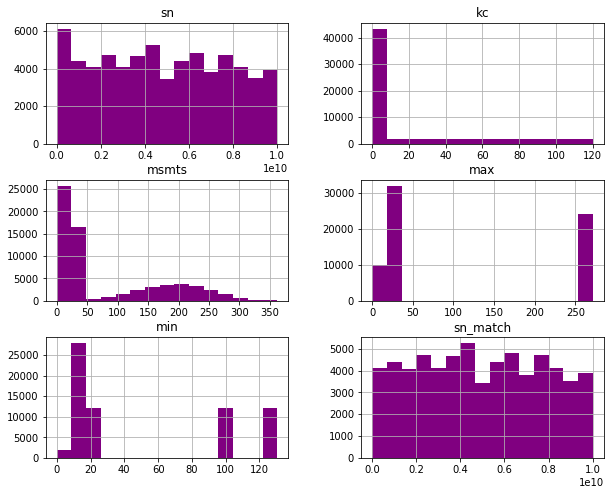

In [78]:
#plt.figure()
manu_df.hist(bins = 15, figsize = (10,8), color = 'purple');

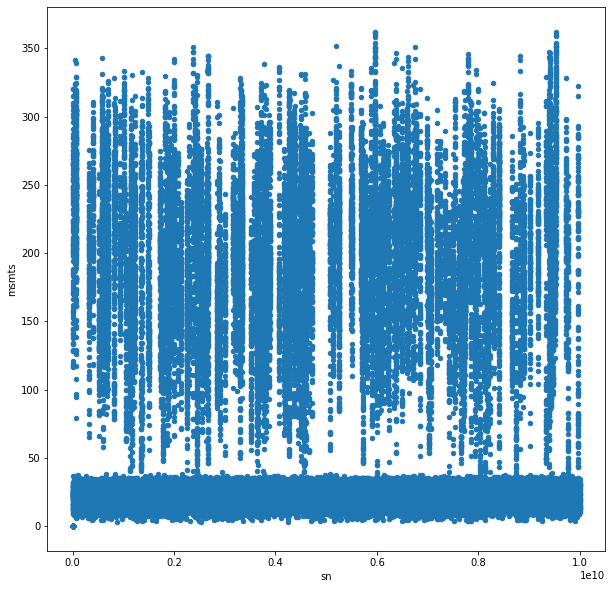

In [79]:
#plt.figure()
manu_df.plot(kind = 'scatter', x = 'sn', y = 'msmts',figsize = (10,10))
plt.show()

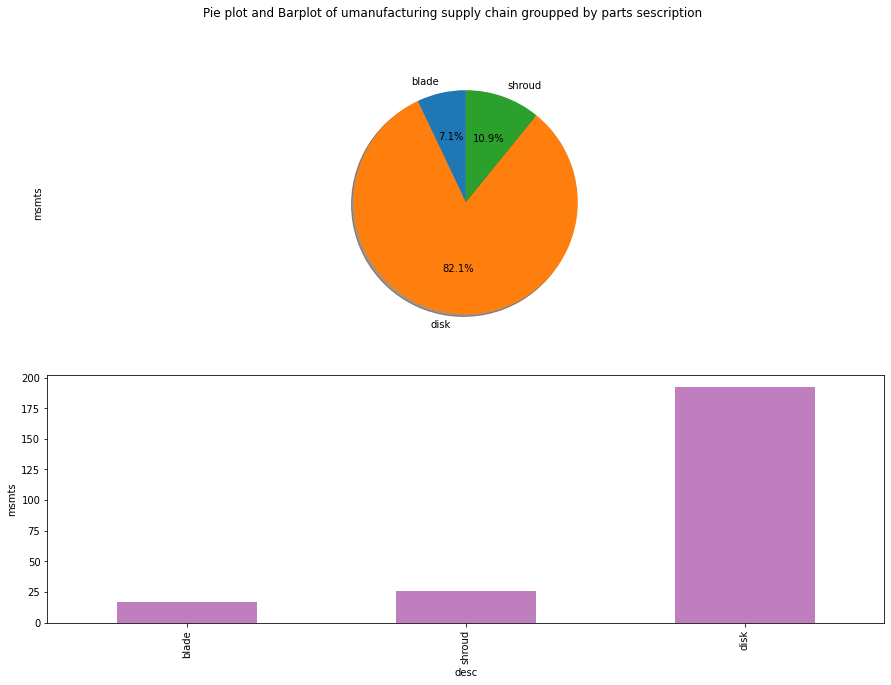

In [80]:
plt.suptitle("Pie plot and Barplot of umanufacturing supply chain groupped by parts sescription")
plt.subplot(2,1,1)
ax = manu_df.groupby('desc').msmts.mean().plot.pie(autopct = "%1.1f%%", shadow = True, startangle = 90, figsize = (15,10))
ax.axis("equal")
plt.subplot(2,1,2)
ax1 = manu_df.groupby('desc').msmts.mean().sort_values(ascending = True).plot.bar(figsize = (15,10), alpha = 0.5,
                                                                                     color = 'purple', ylabel = 'msmts');
plt.show()

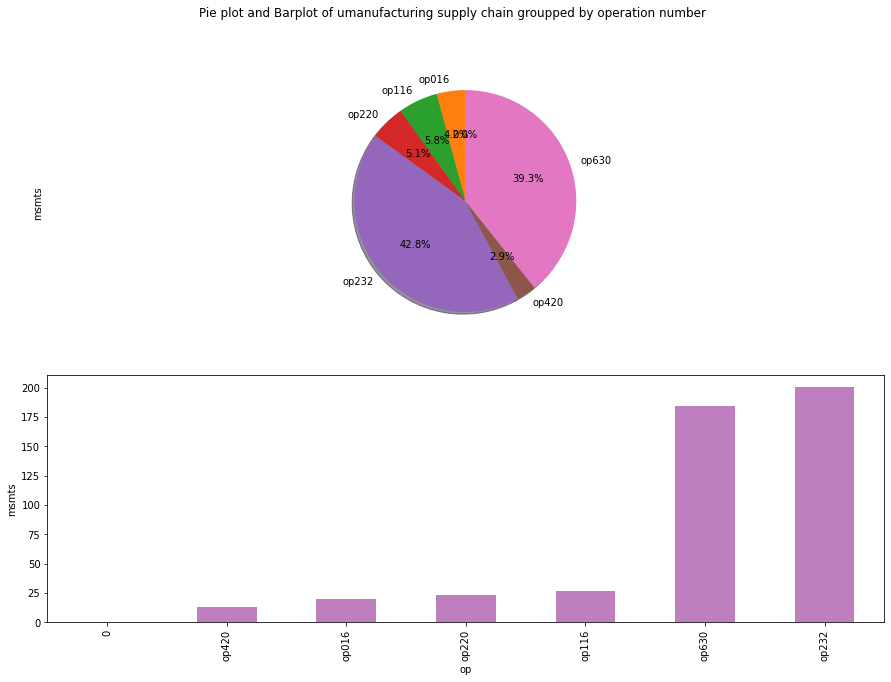

In [81]:
plt.suptitle("Pie plot and Barplot of umanufacturing supply chain groupped by operation number")
plt.subplot(2,1,1)
ax = manu_df.groupby('op').msmts.mean().plot.pie(autopct = "%1.1f%%", shadow = True, startangle = 90, figsize = (15,10))
ax.axis("equal")
plt.subplot(2,1,2)
ax1 = manu_df.groupby('op').msmts.mean().sort_values(ascending = True).plot.bar(figsize = (15,10), alpha = 0.5,
                                                                                     color = 'purple', ylabel = 'msmts');
plt.show()

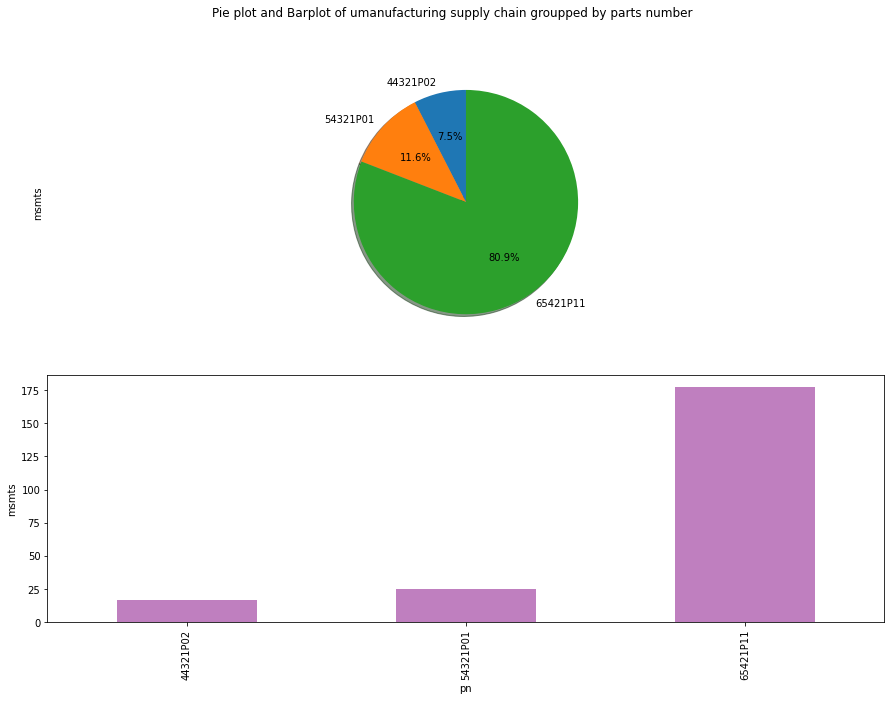

In [82]:
plt.suptitle("Pie plot and Barplot of umanufacturing supply chain groupped by parts number")
plt.subplot(2,1,1)
ax = manu_df.groupby('pn').msmts.mean().plot.pie(autopct = "%1.1f%%", shadow = True, startangle = 90, figsize = (15,10))
ax.axis("equal")
plt.subplot(2,1,2)
ax1 = manu_df.groupby('pn').msmts.mean().sort_values(ascending = True).plot.bar(figsize = (15,10), alpha = 0.5,
                                                                                     color = 'purple', ylabel = 'msmts');
plt.show()

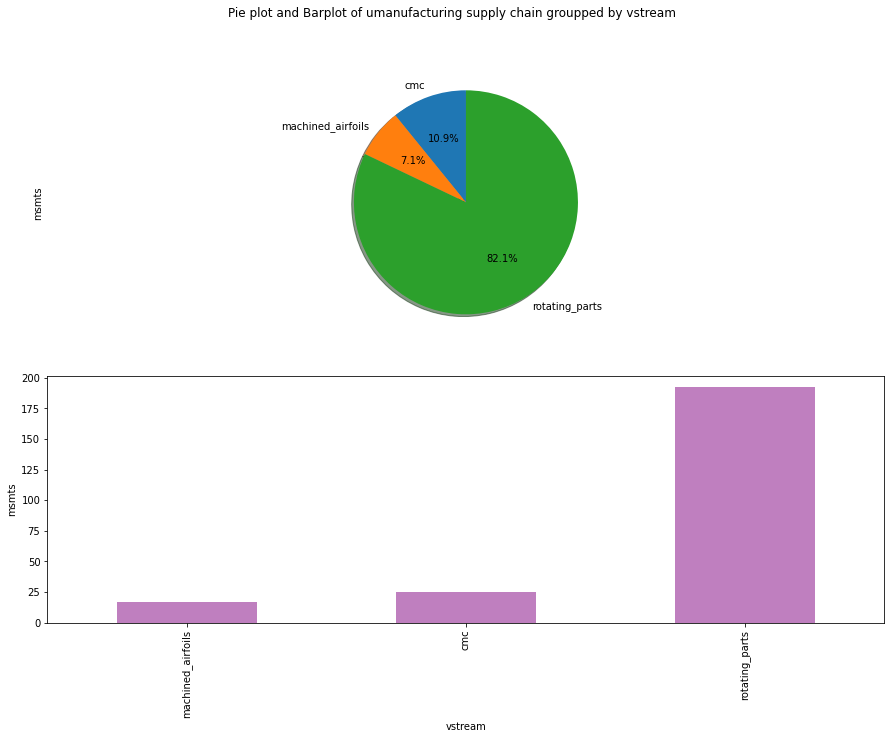

In [83]:
plt.suptitle("Pie plot and Barplot of umanufacturing supply chain groupped by vstream")
plt.subplot(2,1,1)
ax = manu_df.groupby('vstream').msmts.mean().plot.pie(autopct = "%1.1f%%", shadow = True, startangle = 90, figsize = (15,10))
ax.axis("equal")
plt.subplot(2,1,2)
ax1 = manu_df.groupby('vstream').msmts.mean().sort_values(ascending = True).plot.bar(figsize = (15,10), alpha = 0.5,
                                                                                     color = 'purple', ylabel = 'msmts');
plt.show()

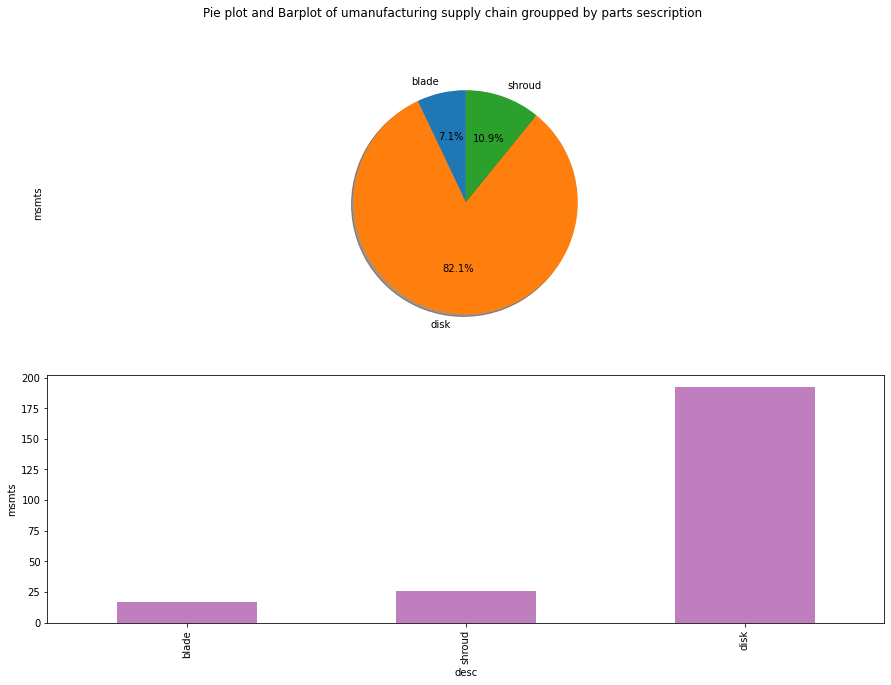

In [84]:
plt.suptitle("Pie plot and Barplot of umanufacturing supply chain groupped by parts sescription")
plt.subplot(2,1,1)
ax = manu_df.groupby('desc').msmts.mean().plot.pie(autopct = "%1.1f%%", shadow = True, startangle = 90, figsize = (15,10))
ax.axis("equal")
plt.subplot(2,1,2)
ax1 = manu_df.groupby('desc').msmts.mean().sort_values(ascending = True).plot.bar(figsize = (15,10), alpha = 0.5,
                                                                                     color = 'purple', ylabel = 'msmts');
plt.show()

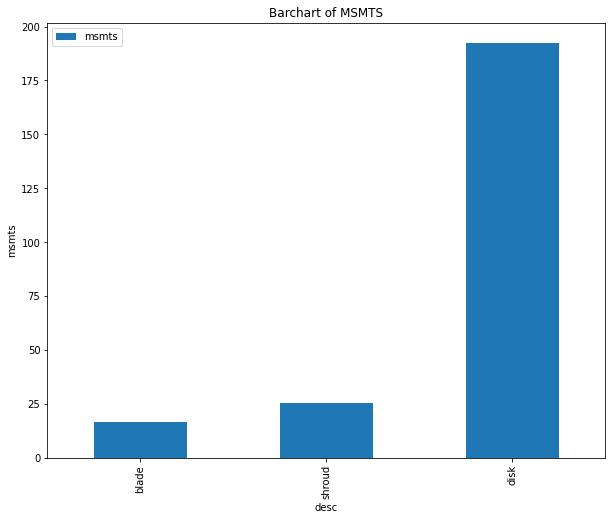

In [85]:
manu_df.groupby('desc').msmts.mean().sort_values(ascending = True).plot.bar(title = 'Barchart of MSMTS',
                                            ylabel = 'msmts', figsize = (10,8));
plt.legend()

In [86]:
manu_df.pn.unique()

array(['54321P01', '44321P02', '65421P11'], dtype=object)

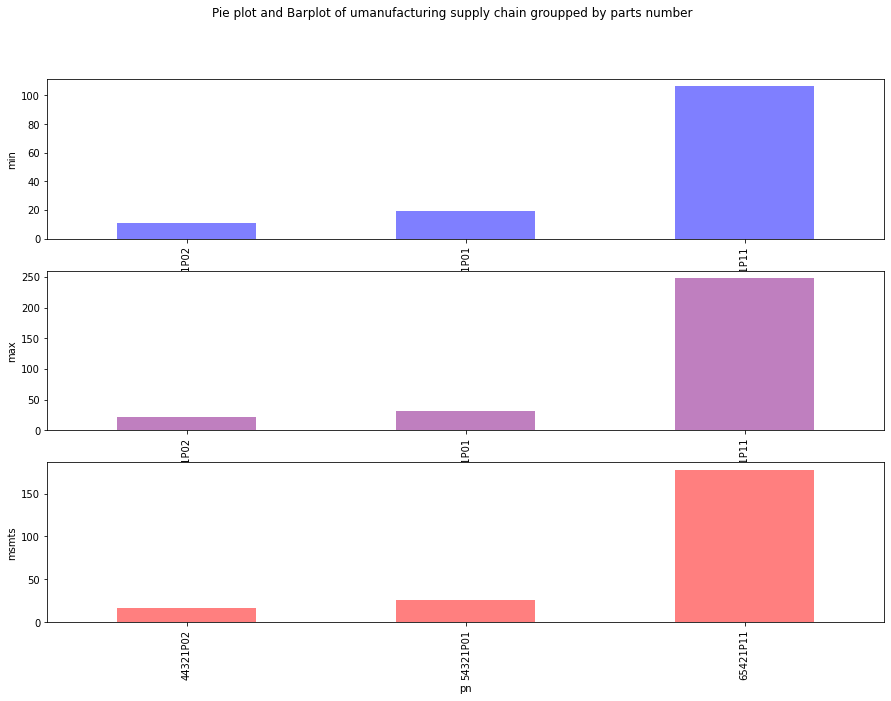

In [87]:
plt.suptitle("Pie plot and Barplot of umanufacturing supply chain groupped by parts number")
plt.subplot(3,1,1)
ax = manu_df.groupby('pn')['min'].mean().plot.bar(figsize = (15,10), alpha = 0.5, color = 'blue', ylabel = 'min');
plt.subplot(3,1,2)
ax1 = manu_df.groupby('pn')['max'].mean().plot.bar(figsize = (15,10), alpha = 0.5, color = 'purple', ylabel = 'max');
plt.subplot(3,1,3)
ax2 = manu_df.groupby('pn')['msmts'].mean().plot.bar(figsize = (15,10), alpha = 0.5, color = 'red', ylabel = 'msmts');
plt.show()